<a href="https://colab.research.google.com/github/manushaurya/padhaibyonefourthlabs/blob/master/0403_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook #used to visualise epochs

$S_{w,b}(x)=\frac{1}{1+e^{-(wx+b)}}$

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

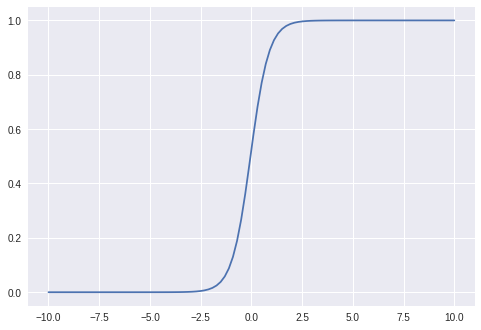

In [3]:
w=2.2 #@param {type: "slider", min: -3, max: 3,step:0.1}
b=0.1
X=np.linspace(-10,10,100) #100 points equally spaced between -10 and 10
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

#More Features(More Dimensions)

$S_{w_1,w_2,b}(x_1,x_2)=\frac{1}{1+e^{-(x_1w_1+x_2w_2+b)}}$

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

3D Plot reference https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [0]:
from mpl_toolkits import mplot3d

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1,XX2 = np.meshgrid(X1,X2)
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])#0 : Red ; 1 : Green

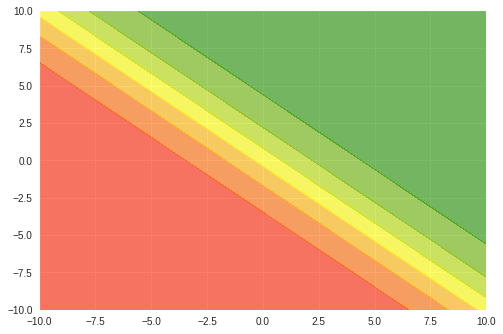

In [8]:
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6)#black =1 white=0
plt.show()

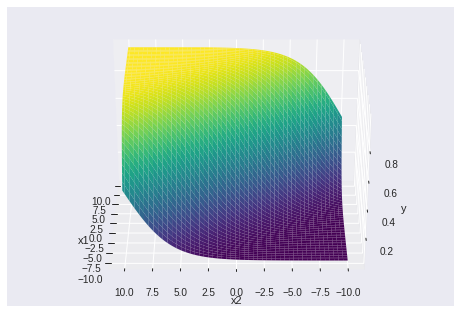

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis') #cmap='binary'#contour3D() can also be used instead of plot_surface()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 180) #we can use the view_init method to set the elevation and azimuthal angles. 
#fig

In above graph x2  greatly influences y than x1, because of the weight assigned to them.

#Compute Loss for given dataset

In [0]:
w_unknown = 0.5
b_unknown  = 0.25
X = np.random.random(25)*20-10 #Range [-10,10]
Y = sigmoid(X,w_unknown,b_unknown)

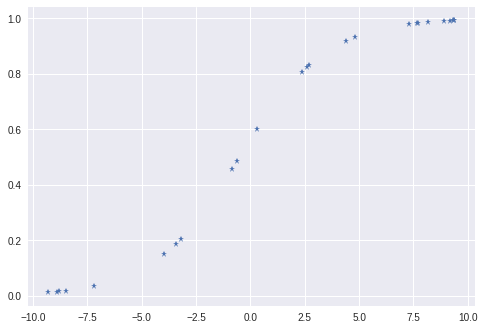

In [11]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y,w_estim,b_estim):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x,w_estim,b_estim))**2
  return loss

In [0]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

In [0]:
WW, BB = np.meshgrid(W,B) #Meshgrid return two 2-D vectors, like a cross product

In [0]:
Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i][j] = calculate_loss(X,Y,WW[i][j],BB[i][j])
    

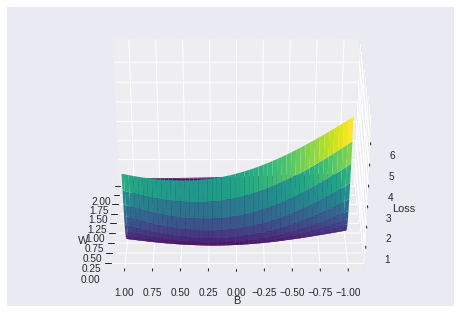

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis') 
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

ax.view_init(30, 180)

In [18]:
ij = np.argmin(Loss)#coordinate of the number minimum in this list
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i*Loss.shape[1])
print(i,j)

62 25


In [19]:
print(WW[i][j],BB[i][j]) #matches with w_estim and b_estim

0.5050505050505051 0.2525252525252526


#Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron :
  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  
  def gradient_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  
  def gradient_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  
  def fit(self,X,Y,epochs=1,lr=1,initialise=True, display_loss=False):#lr is learning rate
    if initialise:
      self.w = np.random.randn(1,X.shape[1])#w is a vector of columns same as X
      self.b = 0
      
    if display_loss:
      loss={}
    
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.gradient_w(x,y)
        db += self.gradient_b(x,y)  
      self.w -= lr*dw
      self.b -= lr*db 
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
        
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
        
      
  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
      

#Fit for Sample Data

In [0]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]


In [0]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

In [0]:
def plot_sig(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap) #plotting points
  #ax.show()

[[-1.05126569 -1.46437653]] [-0.00382106]
[[-0.89811022 -1.51731184]] [-0.02293262]
[[-0.69888815 -1.58337674]] [-0.03772337]
[[-0.46478487 -1.65514589]] [-0.03584412]
[[-0.26902005 -1.70886985]] [-0.01851027]
[[-0.15910764 -1.73450526]] [-0.00540456]
[[-0.09098663 -1.74662182]] [0.00328135]
[[-0.04151663 -1.75225865]] [0.00991457]
[[-0.00204696 -1.75402411]] [0.0155136]
[[ 0.03137661 -1.7530946 ]] [0.02056008]
[[ 0.06087561 -1.75007768]] [0.02531729]
[[ 0.08772787 -1.74530974]] [0.02994794]
[[ 0.11277555 -1.73897832]] [0.03456424]
[[ 0.13661796 -1.73117859]] [0.03925183]
[[ 0.15971292 -1.72194123]] [0.04408284]
[[ 0.18243537 -1.71124607]] [0.04912368]
[[ 0.20511464 -1.69902762]] [0.05444056]
[[ 0.22806102 -1.68517498]] [0.06010398]
[[ 0.25158722 -1.66952729]] [0.06619302]
[[ 0.27602885 -1.65186415]] [0.07280027]


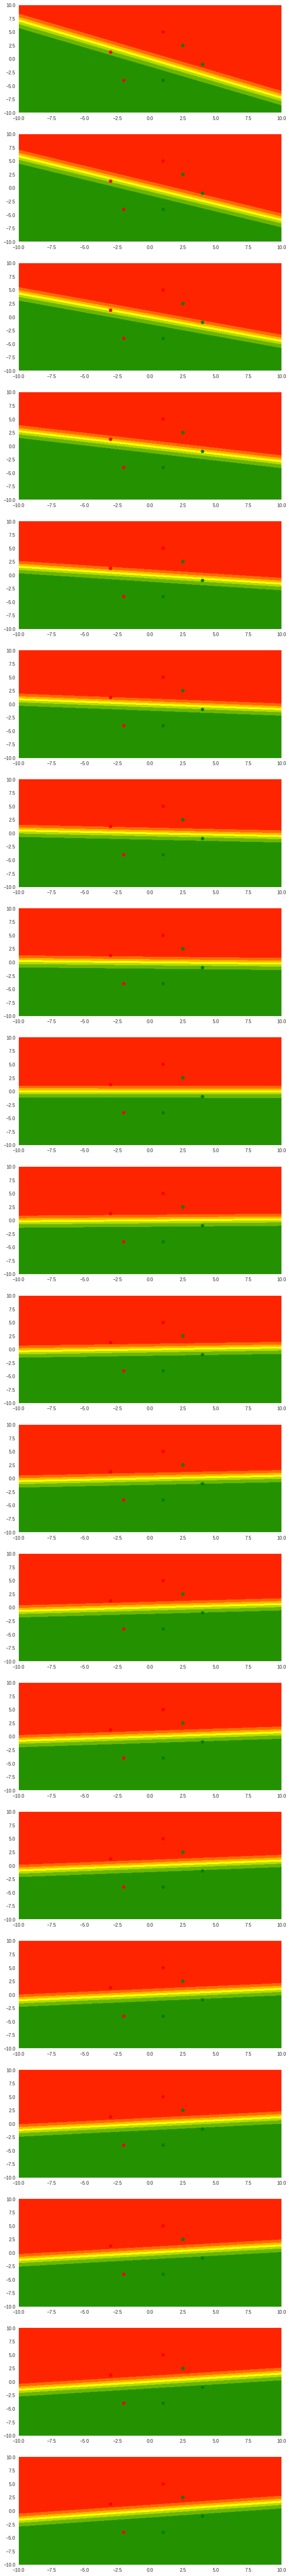

In [24]:
sn.fit(X,Y,1,0.05,True)
N=20
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sig(X,Y,sn,ax)
  sn.fit(X,Y,1,0.25,False) #parameters will not be reinitialised

X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]                                                   ##Animation of Toy data results%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTMLfig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10), xlabel='x', ylabel='y')def plot_sn_animate(X, Y, sn):
 X1 = np.linspace(-10, 10, 100)
 X2 = np.linspace(-10, 10, 100)
 XX1,XX2 = np.meshgrid(X1, X2)
 YY = np.zeros(XX1.shape)
 for i in range(X2.size):
   for j in range(X1.size):
     val = np.asarray([X1[j], X2[i]])
     YY[i, j] = sn.sigmoid(sn.perceptron(val))
 return YY# animation function. This is called sequentially
def animate(i):
 YY = plot_sn_animate(X, Y, sn)
 const = ax.contourf(XX1, XX2, YY, cmap = my_cmap, alpha = 0.6)
 ax.scatter(X[:,0], X[:,1], c=Y, cmap = my_cmap)
 sn.fit(X, Y, 1 , 0.5, False)
 return const# call the animator. blit=True means only re-draw the parts that have changed.
sn.fit(X, Y, 1 , 0.05, True)
anim = animation.FuncAnimation(fig, animate,
                              frames=30, interval=200, repeat = False)HTML(anim.to_html5_video())

#Loading Data

In [25]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 15.2MB/s 


In [0]:
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title Sample file.txt, id 1bXmJurFZbtjixfxtkoE9FZAilq5OOOaI


In [26]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '14gyCuadPkZ1U8lvJGZqZ0Zxv3kaZqdm5' #https://drive.google.com/open?id=14gyCuadPkZ1U8lvJGZqZ0Zxv3kaZqdm5
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KA

In [0]:
!ls

adc.json  sample_data


In [0]:
downloaded.GetContentFile('mobile_cleaned.csv')

In [28]:
!ls

adc.json  mobile_cleaned.csv  sample_data


In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [0]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [0]:
X = data.drop('Rating',axis=1)

In [0]:
Y = data['Rating'].values #Unbinarised Y

In [0]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold = 4.2 #threshold decided where Classes became less skewed
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [33]:
data['Class'].value_counts() #.value_counts(normalize=True) give us the ratio

0    182
1    159
Name: Class, dtype: int64

In [0]:
Y_binarised = data['Class'].values #Binarised Y

#Standardisation

In [0]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [0]:
R = np.random.random([100,1])

In [0]:
R

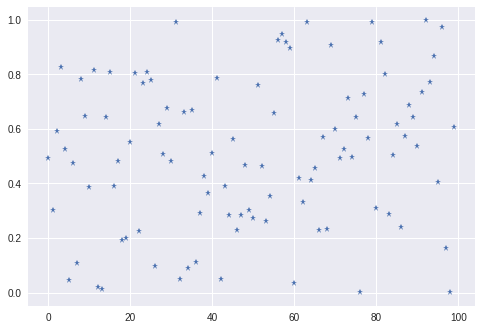

In [39]:
plt.plot(R,'*')
plt.show()

In [43]:
np.mean(R) #We want Mean to be zero for standardization

0.510165910870349

In [42]:
np.std(R) #Standard deviation to be 1

0.2735348231357648

In [0]:
scaler = StandardScaler()

In [45]:
scaler.fit(R) #Mean and Std of R are being taken into the object scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
RT = scaler.transform(R) #R is being transformed as per the mean and std earlier computed

In [51]:
np.mean(RT)

-5.062616992290713e-16

In [52]:
np.std(RT)

1.0000000000000002

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0,stratify=Y_binarised)
#random state =0 ensures that same split will be performed everytime
#stratified=Y_binarised ensures that ratio of classes(1,0) will be almost the same in X_train and X_test

In [0]:
scaler =  StandardScaler()

In [59]:
X_Scaled_train = scaler.fit_transform(X_train)
#fitting and transforming done simultaneously
X_Scaled_test = scaler.transform(X_test)
#P.S : No fitting done on test data. 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))
#Labels will be transformed where Max will fall into 1 and Min in 0, and rest likewise
#Reshape done coz it threw an error with 1D array while it expected 2D

In [64]:
np.min(Y_scaled_train)

0.0

In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [0]:
#Scaling threshold, we computed earlier
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [68]:
scaled_threshold

0.6800000000000002

In [0]:
#Binarizing
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype('int').ravel()

In [0]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype('int').ravel()

#Train on real data

In [0]:
sn = SigmoidNeuron()

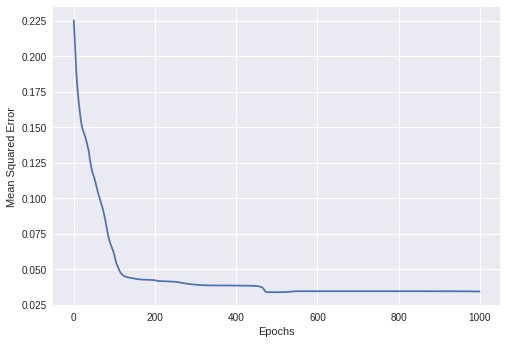

In [137]:
sn.fit(X_Scaled_train,Y_scaled_train,epochs=1000,lr=0.03, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_Scaled_train)
Y_pred_test = sn.predict(X_Scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype('int').ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype('int').ravel()

In [0]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [133]:
print(accuracy_train, accuracy_test)

0.8117647058823529 0.7906976744186046
